# Quadratic Assignment Problem
dealing with assigning a set of facilities to a set of locations, considering the pairwise distances and flows between them. 

**goal**: Minimizing the total cost or distance, taking into account both the distances and the flow.

There are various types of algorithms for different problem structures, such as:

1. Precise algorithms
2. Approximation algorithms
3. Metaheuristics like genetic algorithms and simulated annealing
4. Specialized algorithms

**Example**
Given four facilities (F1, F2, F3, F4) and four Locations (L1, L2, L3, L4). We have a cost matrix that represents the pairwise distances or costs between facilities. Additionally, we have a flow matrix that represents the interaction or flow between locations. Find the assignment that minimizes the total cost based on the interactions between facilities and locations. Each facility must be assigned to exactly one location, and each location can only accommodate one facility.


In [36]:
# Example of cost matrix for the facility location problem
# Distance between locations
locations = [
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
    ]
# like distance

# Communication/Interaction Between Facilities
facilities = [
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
    ]
# like packages sent between facilities per day

Facilities on locations: ['Warehouse', 'Office', 'Factory', 'Store']
Total cost: 44


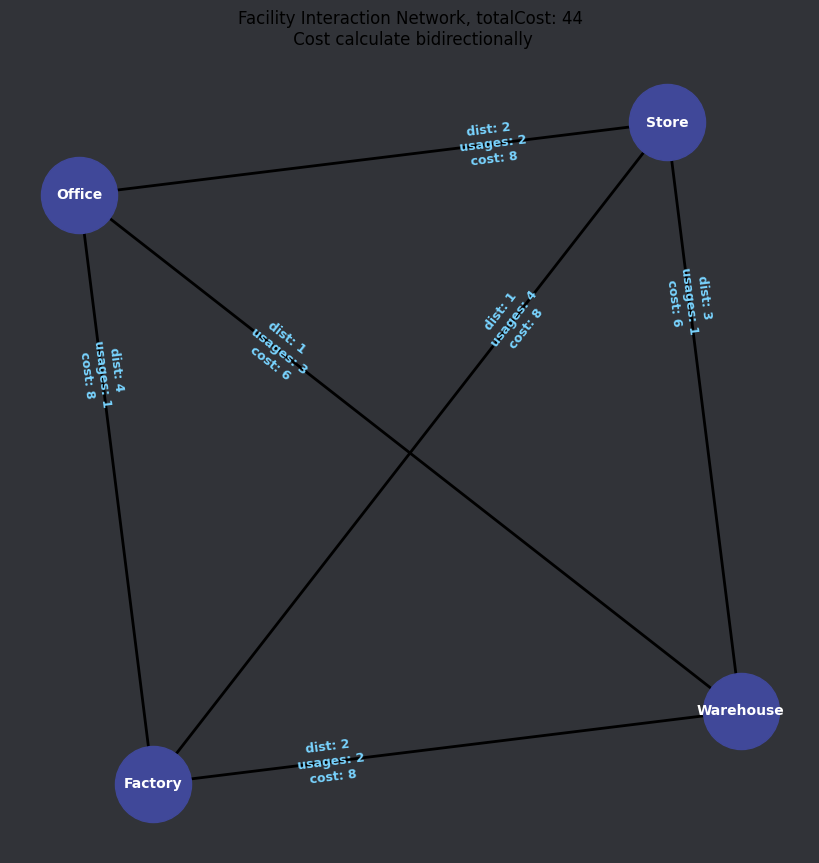

In [37]:
import networkx as nx 
import matplotlib.pyplot as plt
import random

# let order of name be the order used in facility cost
facilities_name = ['Warehouse', 'Factory', 'Office', 'Store']

# index is location, value is facility
# facility_on_location = facilities_name.copy()
# random.shuffle(facility_on_location)
facility_on_location = ['Warehouse', 'Office', 'Factory', 'Store'] # best case scenario 
print("Facilities on locations:", facility_on_location)


def draw_graph(fol: list):
    G = nx.Graph()

    G.add_nodes_from(facilities_name)

    total_cost = 0
    # add edges w/ weight
    for i in range(len(locations)):
        for j in range(i ,len(locations)):
            f1 = fol[i]
            f2 = fol[j]
            f1_idx = facilities_name.index(f1)
            f2_idx = facilities_name.index(f2)
            cost =  2 *locations[i][j] * facilities[f1_idx][f2_idx]
            if cost:
                G.add_edge(f1, f2, cost=f"dist: {locations[i][j]}\n usages: {facilities[f1_idx][f2_idx]}\n cost: {cost}")
                total_cost += cost



    # Increase figure size to reduce label overlap
    fig = plt.figure(figsize=(8, 8))

    # Use a different layout or adjust positions manually if necessary
    pos = nx.spring_layout(G, k=0.5, seed=128)  # The 'k' parameter adjusts spacing between nodes

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='#404899', font_color="white", font_size=10, font_weight='bold', width=2.0)

    # Draw edge labels (with descriptions)
    edge_labels = nx.get_edge_attributes(G, 'cost')  # Use the 'description' attribute
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.3, font_color='#79d4ff', bbox=dict(alpha=0), font_weight='bold')
    fig.set_facecolor('#313338')

    # Print the total cost
    print("Total cost:", total_cost)

    # Show the plot
    plt.title("Facility Interaction Network, totalCost: " + str(total_cost) + "\n Cost calculate bidirectionally")
    plt.show()


draw_graph(facility_on_location)

# Making QUBO
https://qiskit-community.github.io/qiskit-optimization/tutorials/06_examples_max_cut_and_tsp.html

In [38]:
from qiskit_optimization import QuadraticProgram

# Create a Quadratic Program
qp = QuadraticProgram("QAP")

# facility-location pair
size = len(locations)

cities = {}  # dictionary to store binary variables storing the assignment of facilities to locations
for i in range(size):
    for k in range(size):
        cities[f'x_{i}_{k}'] = qp.binary_var(f'x_{i}_{k}')

# Objective function
quad = {}
for i in range(size):
    for k in range(size):
        for j in range(size):
            for l in range(size):
                quad[(f'x_{i}_{k}', f'x_{j}_{l}')
                     ] = locations[i][j] * facilities[k][l]

qp.minimize(quadratic=quad)

# Constraints
# Each facility is assigned to exactly one location

for i in range(size):
    qp.linear_constraint(
        linear={f'x_{i}_{p}': 1 for p in range(size)}, sense='==', rhs=1)

for p in range(size):
    qp.linear_constraint(
        linear={f'x_{i}_{p}': 1 for i in range(size)}, sense='==', rhs=1)

print(qp.prettyprint())

Problem name: QAP

Minimize
  4*x_0_0*x_1_1 + 6*x_0_0*x_1_2 + 2*x_0_0*x_1_3 + 8*x_0_0*x_2_1 + 12*x_0_0*x_2_2
  + 4*x_0_0*x_2_3 + 12*x_0_0*x_3_1 + 18*x_0_0*x_3_2 + 6*x_0_0*x_3_3
  + 4*x_0_1*x_1_0 + 2*x_0_1*x_1_2 + 8*x_0_1*x_1_3 + 8*x_0_1*x_2_0
  + 4*x_0_1*x_2_2 + 16*x_0_1*x_2_3 + 12*x_0_1*x_3_0 + 6*x_0_1*x_3_2
  + 24*x_0_1*x_3_3 + 6*x_0_2*x_1_0 + 2*x_0_2*x_1_1 + 4*x_0_2*x_1_3
  + 12*x_0_2*x_2_0 + 4*x_0_2*x_2_1 + 8*x_0_2*x_2_3 + 18*x_0_2*x_3_0
  + 6*x_0_2*x_3_1 + 12*x_0_2*x_3_3 + 2*x_0_3*x_1_0 + 8*x_0_3*x_1_1
  + 4*x_0_3*x_1_2 + 4*x_0_3*x_2_0 + 16*x_0_3*x_2_1 + 8*x_0_3*x_2_2
  + 6*x_0_3*x_3_0 + 24*x_0_3*x_3_1 + 12*x_0_3*x_3_2 + 16*x_1_0*x_2_1
  + 24*x_1_0*x_2_2 + 8*x_1_0*x_2_3 + 8*x_1_0*x_3_1 + 12*x_1_0*x_3_2
  + 4*x_1_0*x_3_3 + 16*x_1_1*x_2_0 + 8*x_1_1*x_2_2 + 32*x_1_1*x_2_3
  + 8*x_1_1*x_3_0 + 4*x_1_1*x_3_2 + 16*x_1_1*x_3_3 + 24*x_1_2*x_2_0
  + 8*x_1_2*x_2_1 + 16*x_1_2*x_2_3 + 12*x_1_2*x_3_0 + 4*x_1_2*x_3_1
  + 8*x_1_2*x_3_3 + 8*x_1_3*x_2_0 + 32*x_1_3*x_2_1 + 16*x_1_3*x_2_2
  + 4*x_1_3

In [39]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qubo = QuadraticProgramToQubo().convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 11001.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIIZIIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIIZIIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'IZIIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIIZIIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIIZIIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIII

In [40]:
from qiskit.result import QuasiDistribution
from qiskit.quantum_info import Statevector
from math import ceil
import numpy as np

def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part

def sample_most_likely(state_vector: QuasiDistribution | Statevector) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector

    n = ceil(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)

In [41]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer


exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())

result = exact.solve(qubo)
print(result.prettyprint())

def reorder(x, size):
    y = [None, None, None, None]
    for i, v in enumerate(x):
        if v == 1:
            y[int(i) // size] = facilities_name[int(i) % size]
    return y


new_fol = reorder(result.samples[0].x, size)
print(new_fol)
# draw_graph(new_fol)


objective function value: 44.0
variable values: x_0_0=0.0, x_0_1=1.0, x_0_2=0.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=1.0, x_2_1=0.0, x_2_2=0.0, x_2_3=0.0, x_3_0=0.0, x_3_1=0.0, x_3_2=1.0, x_3_3=0.0
status: SUCCESS
['Factory', 'Store', 'Warehouse', 'Office']


In [42]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("objective:", result.eigenvalue.real + offset)


energy: -10957.0
objective: 44.0


energy: -10957.0
QAP objective: 44.0
feasible: True
solution: ['Factory', 'Store', 'Warehouse', 'Office']
Total cost: 44


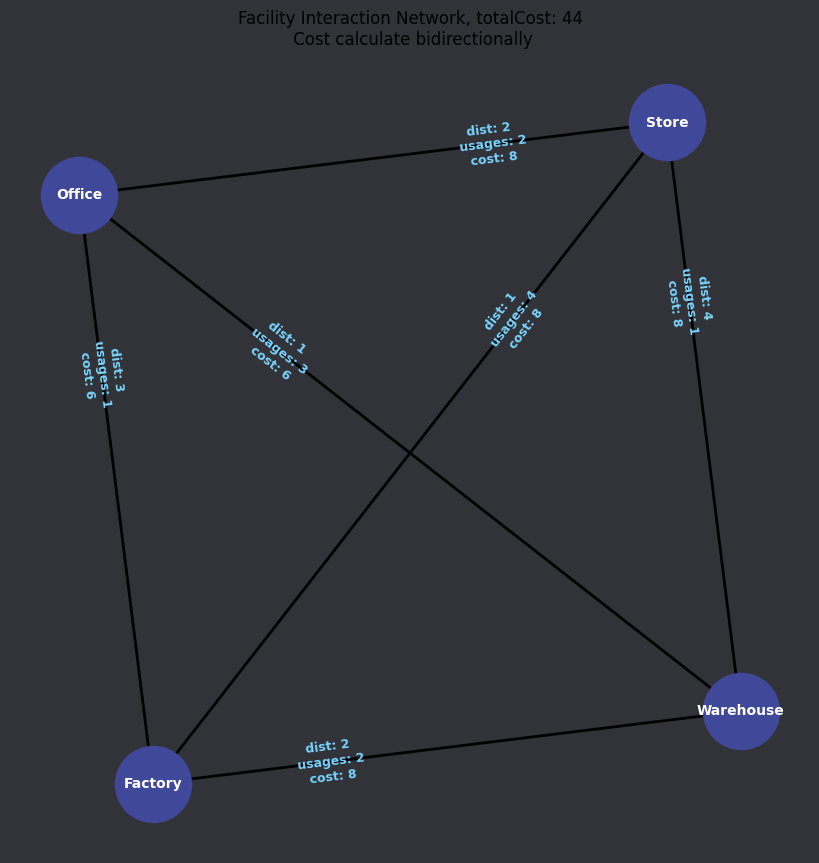

In [43]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("QAP objective:", result.eigenvalue.real + offset)
x = sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = reorder(x, size)
print("solution:", z)
draw_graph(z)

# Running it on quantum computer

We run the optimization routine using a feedback loop with a quantum computer that uses trial functions built with Y single-qubit rotations, $U_{single}(\theta) = \Pi_{i=1}^{n} Y(\theta_i)$, and entangler steps $U_{entangler}$.

In [44]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms import SamplingVQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler

algorithm_globals.random_seed = 123
seed = 10598

energy: -9105.299170022072
time: 1844.2275276184082
feasible: True
solution: ['Store', 'Office', 'Office', 'Warehouse']
Total cost: 36


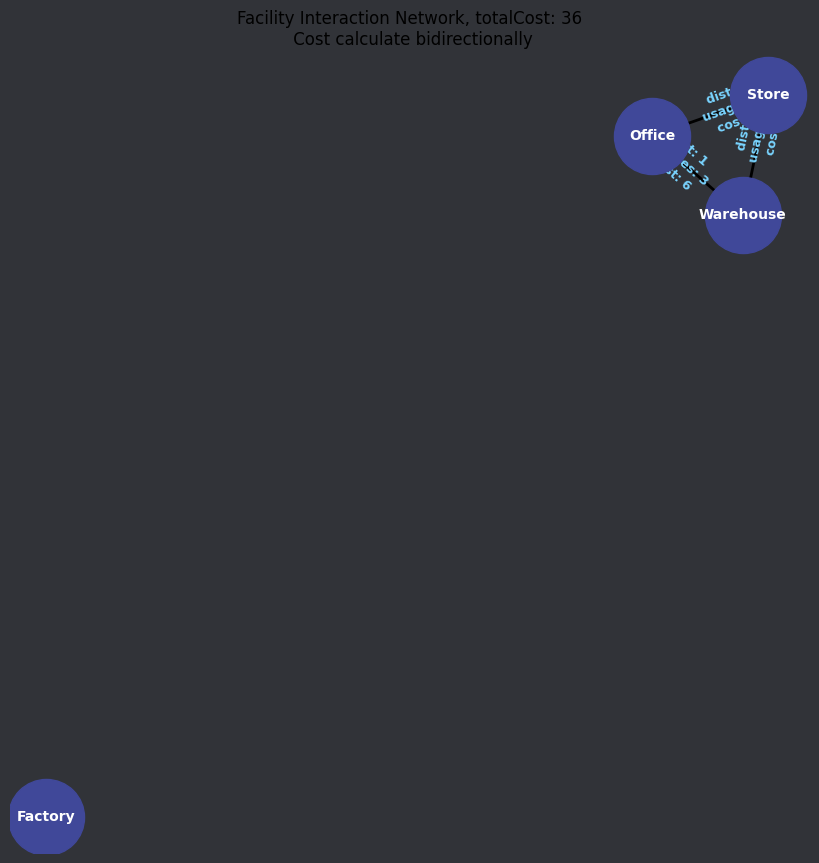

In [45]:
optimizer = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

result = vqe.compute_minimum_eigenvalue(qubitOp)


print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = reorder(x, size)
print("solution:", z)
draw_graph(z)

objective function value: 50.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=0.0, x_0_3=1.0, x_1_0=0.0, x_1_1=0.0, x_1_2=1.0, x_1_3=0.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0
status: SUCCESS
solution: ['Store', 'Office', 'Office', 'Warehouse']
Total cost: 36


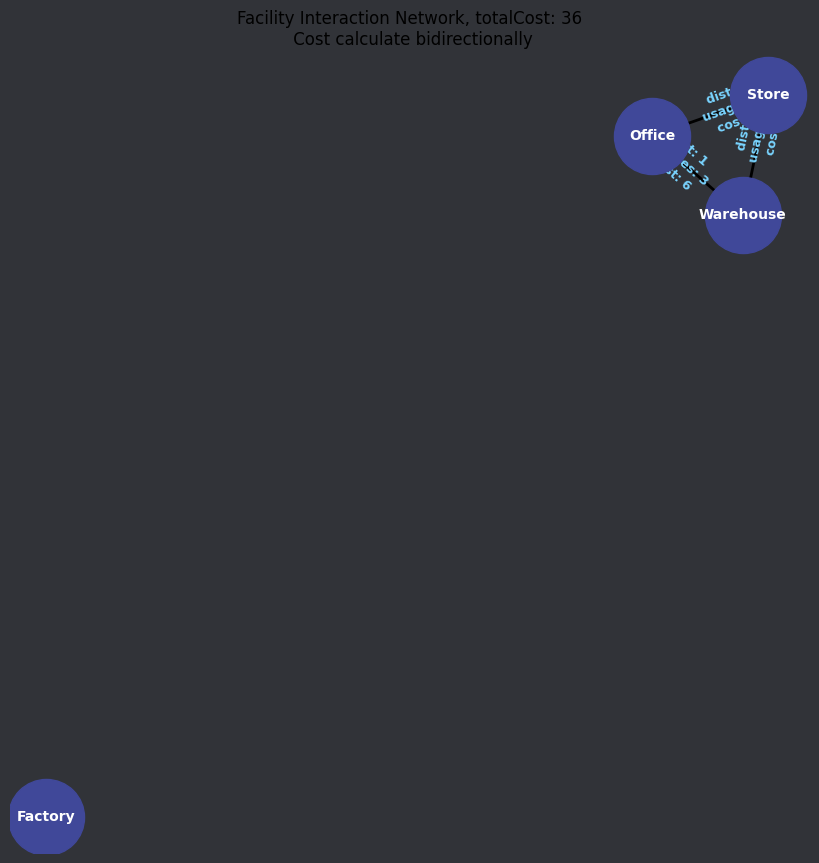

In [46]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

z = reorder(x, size)
print("solution:", z)
draw_graph(z)